# 의사결정나무(Decision Tree )
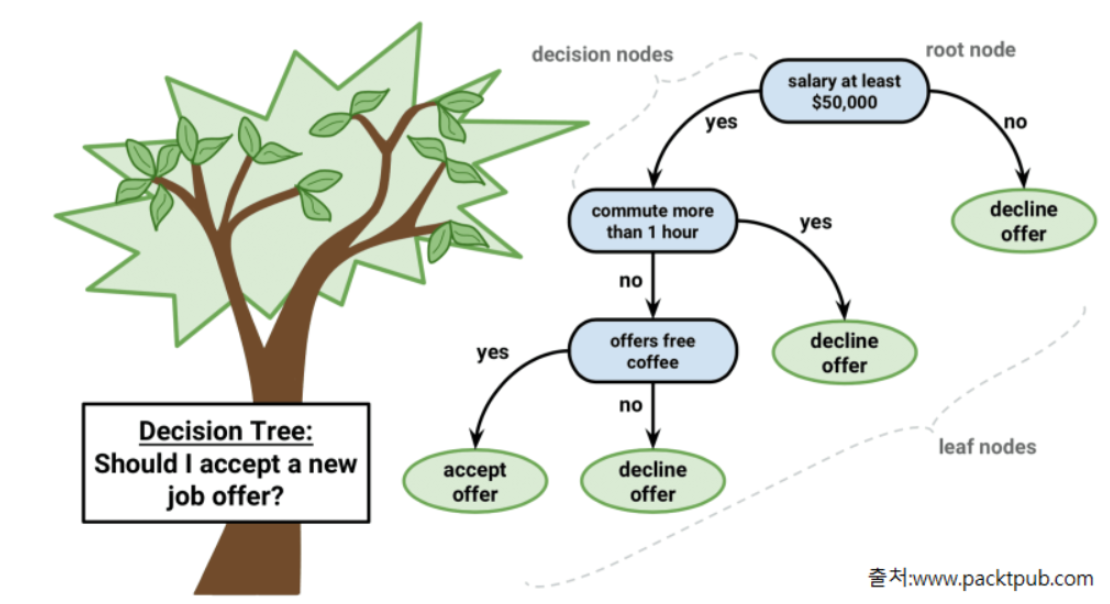

## 개요

- 데이터를 잘 분류할 수 있는 질문을 던져 가며 대상을 좁혀가는 '스무고개'와 비슷한 형식의 알고리즘.
- 분기해 나가는 구조가 Tree 구조와 같기 때문에 Decision Tree 라고 한다.
    - 순도는 증가하고 불순도는 최대한 감소하는 방향으로 조건을 만들어 학습을 진행한다.
    - 하위노드는 yes/no 두 개로 분기 된다.

- 머신러닝 모델들 중 몇안되는 White box 모델로 결과에 대한 해석이 가능하다.
- 과대적합(Overfitting)이 발생하기 쉽다.
- 앙상블기반 알고리즘인 랜덤 포레스트와 많은 부스팅(Boosting)기반 앙상블 모델들의 기반 알고리즘으로 사용된다.

> ### 순도/불순도 
>    - 서로 다른 종류의 값들이 섞여 있는 비율
>    - 한종류의 값이 많을 수록 순도가 높고 불순도는 낮다.

## 용어
- Root Node : 시작 node
- Decision Node (Intermediate Node): 중간 node
- Leaf Node(Terminal Node) : 마지막 단계의 노드로 최종결과를 가진다.


## 과대적합(Overfitting) 문제
- 모든 데이터셋이 모두 잘 분류 되어 불순도가 0이 될때 까지 분기해 나간다.
- Root에서 부터 하위 노드가 많이 만들어 질 수록 모델이 복잡해져 과대적합이 발생할 수 있다.
- 과대적합을 막기 위해서는 적당한 시점에 하위노드가 더이상 생성되지 않도록 해야 한다.
    - 가지치기(Pruning)라고 한다.
    
## 하이퍼파라미터
- criterion
    - 불순도 계산 방식을 하이퍼파라미터
    - gini (기본값)
    - entropy
- 가지치기 관련 하이퍼파라미터
    - max_leaf_nodes : 생성될 최대 Leaf Node 개수 제한
    - max_depth : 최대 깊이
    - min_samples_leaf: 가지를 칠 최소 sample 수. smaple 수가 지정한 값보다 작으면 불순도와 상관없이 가지를 치지 않는다.



## Feature(컬럼) 중요도 조회
- **feature_importances_** 속성
    - 모델을 만들때 각 Feature의 중요도를 반환
    - input data 에서 중요한 feature를 찾기 위해 decision tree를 이용하기도 한다.

## wine color 분류
- https://archive.ics.uci.edu/ml/datasets/Wine+Quality
- features
    - 와인 화학성분들
        - fixed acidity : 고정 산도
        - volatile acidity : 휘발성 산도
        - citric acid : 시트르산
        - residual sugar : 잔류 당분
        - chlorides : 염화물
        - free sulfur dioxide : 자유 이산화황
        - total sulfur dioxide : 총 이산화황
        - density : 밀도
        - pH : 수소 이온 농도
        - sulphates : 황산염
        - alcohol : 알콜
    - quality: 와인 등급 (A>B>C)
- target - color
    - 0: white, 1: red

In [15]:
import pandas as pd
import numpy as np

In [26]:
wine=pd.read_csv('data/wine.csv')
wine.shape

(6497, 13)

In [29]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,C,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,C,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,C,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,B,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,C,1


In [18]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null object
color                   6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [19]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [20]:
# X, y(color)를 나누기
y = wine['color']
X = wine.drop(columns=['color'])

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [22]:
X['quality'].head()

0    C
1    C
2    C
3    B
4    C
Name: quality, dtype: object

In [23]:
# quality -> Label Encoding
from sklearn.preprocessing import LabelEncoder

l_ecoder=LabelEncoder()
X['quality']=l_ecoder.fit_transform(X['quality'])
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [24]:
# 모델 생성 - Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Classifier 분류, Regressor 예측

In [25]:
tree_clf=DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'C'

In [ ]:
# 검증
from sklearn.metrics import classification_report, roc_auc_score
pred_train=tree_clf.predict(X_train)
pred_test=tree_clf.predict(X_test)

print(classification_report(y_train, pred_train))
print(classification_report(y_test, pred_test))

In [ ]:
roc_auc_score(y_train, pred_train), roc_auc_score(y_test, pred_test)

In [ ]:
# graphviz를 이용해 결정트리의 분류 Tree를 확인
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

graph=Source(export_graphviz(tree_clf, out_file=None, feature_names=X.columns, class_names=['white','red'], rounded=True, filled=True))

svg=SVG(graph.pipe(format='svg'))
display(svg)

### GridSerchCV 를 이용해 최적의 하이퍼파라미터 찾기

In [ ]:
from sklearn.model_selection import GridSearchCV
param={
    'max_depth':range(1,10),
    'min_samples_leaf':range(5,50)  # 가지를 칠 최소 sample(관측치(행)) 개수    
}

g_search=GridSearchCV(DecisionTreeClassifier(),
                      param,
                      cv=5,
                      n_jobs=-1,
                      scoring=['accuracy','f1','roc_auc'],  # 'recall', 'precision'
                      refit='accuracy'  # scoring이 여러개일 때 ranking을 정할 지표를 지정
                     )

In [ ]:
g_search.fit(X, y)

In [ ]:
g_search.best_params_

In [ ]:
result_df=pd.DataFrame(g_search.cv_results_)  # .cv_results_: 전체 결과 조회

In [ ]:
result_df.sort_values('rank_test_accuracy').head()

In [ ]:
result_df.filter(like='mean_test')

### Feature(컬럼) 중요도 조회

In [ ]:
best_model=g_search.best_estimator_

In [ ]:
features=best_model.feature_importances_  # 각 컬럼의 중요도 반환
features

In [ ]:
f_i=pd.Series(features, index=X.columns).sort_values()
f_i

In [14]:
f_i.plot(kind='barh', figsize=(10,10), color='w')

NameError: name 'f_i' is not defined

# 앙상블(Ensemble) 기법
- 하나의 모델만을 학습시켜 사용하지 않고 여러 모델을 학습시켜 결합하는 방식으로 문제를 해결하는 방식
- 개별로 학습한 여러 모델을 조합해 과적합을 막고 일반화 성능을 향상시킬 수 있다.
- 개별 모델의 성능이 확보되지 않을 때 성능향상에 도움될 수 있다.

# Random Forest (랜덤포레스트)
- 트리 기반의 앙상블 모델 중 하나 (Bagging)

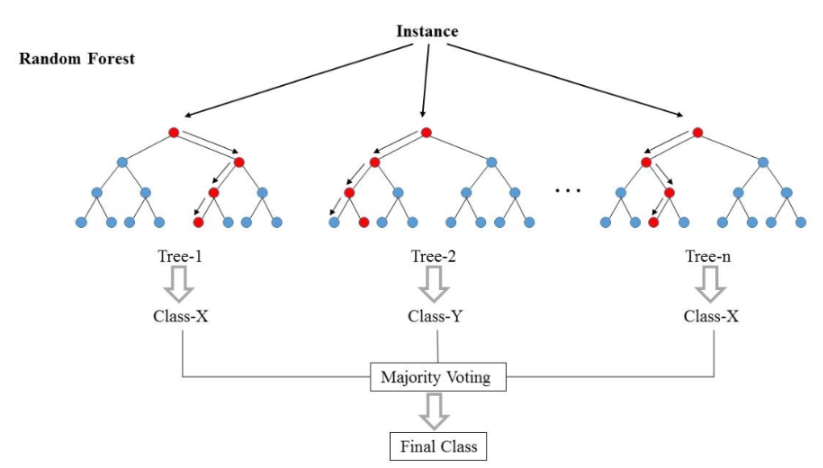

- 다수의 결정트리를 사용해서 성능을 올린 앙상블 알고리즘의 하나
    - 학습데이터를 샘플링해서 다수의 결정트리를 생성하고 이를 기반으로 다수결로 결과를 결정하는 방식
    - 다수의 결정트리를 만드는데서 랜덤포레스트라고 부른다.
- 처리속도가 빠르며 분류 성능도 높은 모델로 알려져 있다.   
- 랜덤포레스트의 절차
    - 묶을 결정트리 개수를 하이퍼파라미터로 받는다.
    - 랜덤 포레스트를 구성하는 모든 결정트리가 서로 다르도록 만든다.
        - 각 트리는 **부트스트랩 샘플링**(중복을 허용하면서 랜덤하게 샘플링하는 방식)으로 데이터셋을 준비한다. (총데이터의 수는 원래 데이터셋과 동일 하지만 일부는 누락되고 일부는 중복되 있다.)
        - 각 트리는 **전체 피처중 일부의 피처만** 랜덤하게 가지게 된다.
    - 각 트리별로 예측결과를 내고 분류의 경우 그 예측을 모아 다수결 투표로 클래스 결과를 낸다. 
    - 회귀의 경우는 예측 결과의 평균을 낸다.

- **주요 하이퍼파라미터**
    - n_estimators
        - tree의 개수
        - 시간과 메모리가 허용하는 범위에서 클수록 좋다. 
    - max_features
        - 각 트리에서 선택할 feature의 개수
        - 클수록 각 트리간의 feature 차이가 없어지고 작을 수록 차이가 많이 나게 된다.
    - max_depth, min_samples_leaf, ..
        - 트리의 최대 깊이, 가지를 치기 위한 최소 샘플 수 등 결정 트리에서 과적합을 막기 위한 파라미터들을 랜덤 포레스트에 적용할 수 있다.

### 와인 데이터셋

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wine=pd.read_csv('data/wine.csv')
wine.shape

(6497, 13)

In [3]:
y=wine['color']
X=wine.drop(columns=['color','quality'])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(n_estimators=200, max_depth=3, max_features=7)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
pred_train=rf_clf.predict(X_train)
pred_test=rf_clf.predict(X_test)

In [7]:
from sklearn.metrics import classification_report, roc_auc_score

In [8]:
report=classification_report(y_train, pred_train)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3673
           1       0.98      0.97      0.98      1199

    accuracy                           0.99      4872
   macro avg       0.99      0.98      0.98      4872
weighted avg       0.99      0.99      0.99      4872



In [9]:
report=classification_report(y_test, pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1225
           1       0.98      0.95      0.97       400

    accuracy                           0.98      1625
   macro avg       0.98      0.97      0.98      1625
weighted avg       0.98      0.98      0.98      1625



### feature 중요도

In [10]:
rf_clf.feature_importances_

array([9.88991063e-03, 6.81722602e-02, 3.26913110e-03, 7.60597806e-03,
       4.12248073e-01, 1.07360644e-02, 4.48367290e-01, 2.29902885e-02,
       1.63875598e-03, 1.46569147e-02, 4.25333509e-04])

In [12]:
fi=pd.Series(rf_clf.feature_importances_, index=X.columns)
fi

fixed acidity           0.009890
volatile acidity        0.068172
citric acid             0.003269
residual sugar          0.007606
chlorides               0.412248
free sulfur dioxide     0.010736
total sulfur dioxide    0.448367
density                 0.022990
pH                      0.001639
sulphates               0.014657
alcohol                 0.000425
dtype: float64

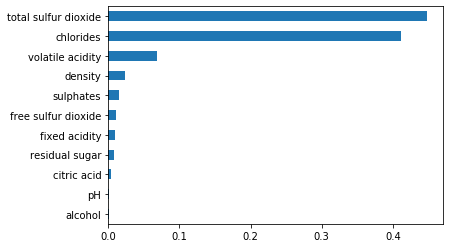

In [27]:
fi.sort_values().plot(kind='barh')

## TODO 위스콘신 유방암 데이터셋

### 데이터셋 로드

### train, test 셋 분리

### 모델(Random Forest) 생성 및 학습

### 검증 - 정확도

### 특성 중요도 (Feature importance) 조회및 시각화